In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score # for evaluate model

**Random Forest**: Ağaçların Toplamından oluşan bir algoritma. **Decision Tree**'ler içinde (data) bizim belirlediğimiz sayıda sample'lar seçilip(sub data) **toplanıyor** ve çıkan sonuçların **ortalaması** alınarak, RF algoritmasının sonucu budur şeklinde denmektedir. 

- Birçok algoritmayı birleştirdiğinden ötürü çok güçlü bir algoritmadır, ensemble learning algoritması diye de geçebilir.

RF'nin kullanım alanları:

- Film izledikten sonra benzer filmleri önermesini genellikle RF' ile sağlanır.
- body part classification(el, ayak, kafa tanımlama)
- stock price prediction
- tavsiye sistemleri

### Veriseti ne anlatıyor?

1.seviye sahaya en yakın olan 100 tl, 10. Seviye sahaya en uzak olan bölüm 5 tl.

# 1-Read Data

In [9]:
df = pd.read_csv("dataset.csv",sep = ";")
df.head()

,distance,price
0,1,100
1,2,80
2,3,70
3,4,60
4,5,50
5,6,40
6,7,30
7,8,20
8,9,10
9,10,5


In [3]:
x = df.iloc[:,0].values.reshape(-1,1) # distance
y = df.iloc[:,1].values.reshape(-1,1) # price

# 2-Create Model

**random_state=42** (42 yerine başka bir sayı da olabilirdi), 100 ağaç her seferinde rasgele olarak farklı output oluşacaktı, ama random state=42 diyerek, hep aynı sonucu şekilde random olarak karıştırmasını istiyoruz.

- Kodu 2. kez çalıştırdığımızda sonucun aynı çıkmasını sağlar, aynı şekilde (**aynı random değerleri verecek şekilde**) karıştırır diyebiliriz.

In [4]:
# n_estimators = number of trees (RF'de 100 tane ağaç(sub data) kullanılacak)

rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf.fit(x,y)

C:\Users\Pointo2\AppData\Local\Temp/ipykernel_13164/2909583449.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x,y)


RandomForestRegressor(random_state=42)

# 3-Predict Data

In [5]:
print("7.8 seviyesinde fiyatı: ",rf.predict([[7.8]]))

7.8 seviyesinde fiyatı:  [22.7]


In [6]:
# minimum x değerinden, max x değerine kadar 0.01 aralıklarla değerler oluşturur
x_test = np.arange(min(x), max(x), 0.01).reshape(-1, 1) 
y_pred = rf.predict(x_test)

# 4-Visualize Data

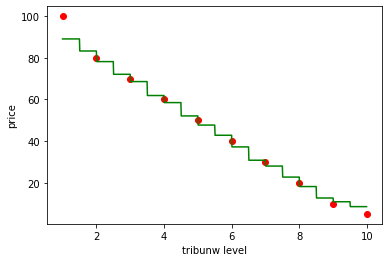

In [7]:
plt.scatter(x, y, color="red")
plt.plot(x_test, y_pred, color="green")
plt.xlabel("tribunw level")
plt.ylabel("price")
plt.savefig("random_forest.png")
plt.show()

# 5-Evaluate Model

# Note

Elimizdeki test verisi (y_pred) 'deki instance sayısı, y'deki ile uyumsuz olduğu için şimdilik x verimizle idare edeceğiz.

- r square score değeri 1'e ne kadar iyiyse algoritma o kadar başarılıdır.! :)

In [10]:
y_test = rf.predict(x)
print("r_square score: ", r2_score(y, y_test))

r_square score:  0.9798724794092587
